<a href="https://colab.research.google.com/github/JK-Pair/Stock_analysis_project/blob/master/Thai_Stock_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_datareader

In [2]:
import os, sys
import numpy as np
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
stock_list =  ['TRUE', 'SCB', 'BBL', 'KTB', 'AOT', 'PTT'] 
start_date = "2017-08-27" 
end_date = "2020-01-09"

In [6]:
data = {}
for quote in tqdm(stock_list):
    try:        
        data[quote] = pdr.get_data_yahoo('{}.BK'.format(quote), start=start_date, end=end_date)        
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1]) 

100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


In [9]:
print("Show all stocks in the list", list(data.keys()))
[ df.head() for key, df in data.items()]

Show all stocks in the list ['TRUE', 'SCB', 'BBL', 'KTB', 'AOT', 'PTT']


[            High   Low  Open  Close       Volume  Adj Close
 Date                                                       
 2017-08-28  5.25  5.15  5.20   5.25   44599700.0   4.960281
 2017-08-29  5.55  5.20  5.25   5.55  313381700.0   5.243726
 2017-08-30  5.70  5.55  5.60   5.55  147617200.0   5.243726
 2017-08-31  5.65  5.40  5.60   5.60  246335000.0   5.290966
 2017-09-01  5.65  5.45  5.60   5.55  114300600.0   5.243726,
              High    Low   Open  Close      Volume   Adj Close
 Date                                                          
 2017-08-28  144.5  144.5  144.5  144.5    681800.0  123.949348
 2017-08-29  149.0  144.0  144.5  148.5  24750900.0  127.380463
 2017-08-30  152.0  149.5  150.5  150.5  15341000.0  129.096024
 2017-08-31  151.5  149.5  150.5  150.5   9346300.0  129.096024
 2017-09-01  152.0  150.5  151.0  151.0   5463700.0  129.524933,
              High    Low   Open  Close     Volume   Adj Close
 Date                                                       

[Text(0.5, 1.0, 'TRUE'),
 Text(0.5, 1.0, 'SCB'),
 Text(0.5, 1.0, 'BBL'),
 Text(0.5, 1.0, 'KTB'),
 Text(0.5, 1.0, 'AOT'),
 Text(0.5, 1.0, 'PTT')]

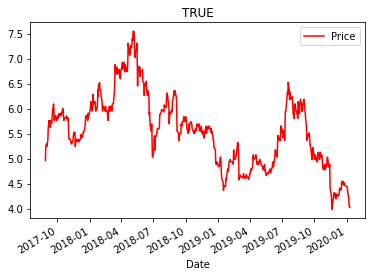

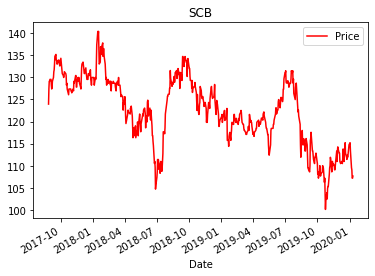

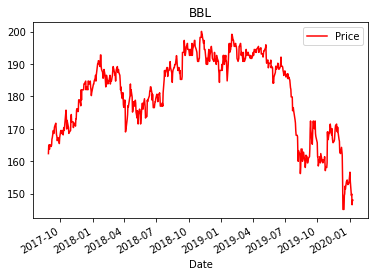

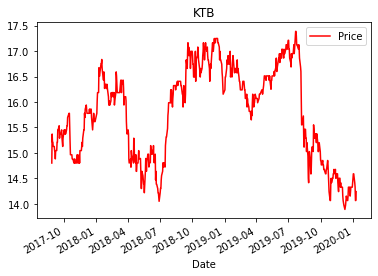

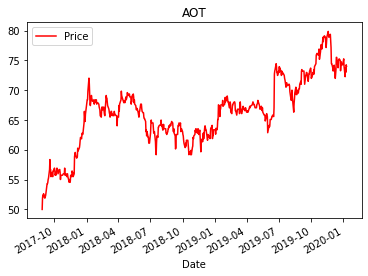

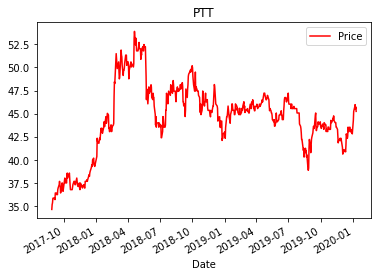

In [10]:
[ df.plot(y='Adj Close', label='Price', style='-r').set_title(key)  for key, df in data.items()]